In [1]:
import pandas as pd
import numpy as np

In [2]:
from metpy.units import units
from metpy.calc import potential_temperature
import matplotlib.pyplot as plt

In [3]:
from glob import glob 
flist = sorted(glob('./datasets/*.tab'))

In [35]:
blh=[320,100,410,180,290,90]

In [4]:
varnames = ["DateTime", "z", "p", "Tc", "RH", "TTechC", "RHTech", "N8", "N12", "N150", "Var11", "Var12", "Var13", "Var14", "Var15", "Var16", "Var17", "Var18", "Var19", "Var20", "Var21", "Var22", "Var23", "Var24", "Var25", "Var26", "Var27"]
varnamesmet = ['datetime', 'p', 'Tc', 'rh', 'wspd', 'wdir', 'z']

In [5]:
zg = range(0,1201,10)

Text(0.5, 0, 'Concentration [# cm$^{-3}$]')

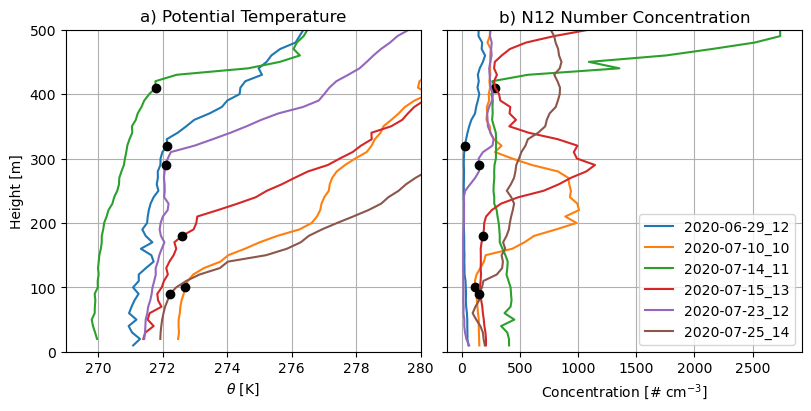

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2, constrained_layout=True, sharey=True, figsize=(8,4))

blh=[320,100,410,180,290,90]

for f, b in zip(flist, blh):

    date = f.split('/')[2][:13]
    f2 = glob(f'./MetDataset/*{date}*')[0]
    
    df = pd.read_csv(f, delimiter='\t', skiprows=50, names=varnames)
    df2 = pd.read_csv(f2, delimiter='\t', skiprows=29, names=varnamesmet)
    df2 = df2[df2.datetime >= df.DateTime[0]]
    df2 = df2[df2.datetime <= df.DateTime.iloc[-1]]


    df['bin'] = np.digitize(df.z, zg)
    df2['bin'] = np.digitize(df2.z, zg)
    # df['theta'] = potential_temperature(df['p'].values*units('hPa'), df['Tc'].values*units('degC'))
    df2['theta'] = (df2.Tc + 273.15) * (1000/df2.p)**(287/1004)

    metbin = df2.groupby('bin').mean('theta')
    numbin = df.groupby('bin').mean('N12')
    
    metbin['z'] = [zg[i] for i in metbin.index]
    numbin['z'] = [zg[i] for i in numbin.index]
    
    metbin.plot(x='theta', y='z',ax=ax1, legend=None)
    numbin.plot(x='N12', y='z', ax=ax2,label=date)


    ax1.plot(metbin.set_index('z').loc[b].theta, b,'o', color='k')
    ax2.plot(numbin.set_index('z').loc[b].N12, b,'o', color='k')
    
plt.ylim(0,500)
ax1.set_xlim(269, 280)
ax1.grid(visible=True)
ax2.grid(visible=True)

ax1.set_title('a) Potential Temperature')
ax1.set_xlabel('$\\theta$ [K]')
ax1.set_ylabel('Height [m]')

ax2.set_title('b) N12 Number Concentration')
ax2.set_xlabel('Concentration [# cm$^{-3}$]')

plt.savefig('plots/01.png')
# ax2.set_xscale('log')